In [1]:
%matplotlib inline

Convert to grayscale using the apply method
===========================================

This example shows how to use `squidpy.ImageContainer.apply` to convert
an image layer to grayscale. This calls `squidpy.im.process` in the
background.

We take the mean of the three channels(RGB) using the user-defined
function `` `rgb2gray ``[ to convert the image to grayscale. The
function ]{.title-ref}`rgb2gray`[ computes the mean of the three
channels (RGB) across axis 3. The purpose of this example is to show how
the ]{.title-ref}`apply`[ method
{meth}\`squidpy.ImageContainer.apply]{.title-ref} can be used.

:::{seealso}
- {doc}`compute_smooth` 
- {doc}`compute_process_hires` 
- {doc}`compute_gray`

:::


In [3]:
import numpy as np

import matplotlib.pyplot as plt

import squidpy as sq

First, we load the H&E stained tissue image. Here, we only load a
cropped dataset to speed things up. In general,
{func}`squidpy.im.ImageContainer.apply` can also process very large images.
(See {doc}`compute_process_hires`).


In [4]:
img = sq.datasets.visium_hne_image_crop()

  0%|          | 0.00/35.6M [00:00<?, ?B/s]

The method {func}`squidpy.im.ImageContainer.apply` takes a function as an
input. Such function, or a mapping of `` `{'{library_id}': function} ``[
takes a {class}\`numpy.ndarray]{.title-ref} as input and returns an
image-like output. Here, the function takes `` `x ``\`\`, which is a
numpy array as an input and returns the mean of three channels across
axis 3 and produces image-like output.


In [5]:
def rgb2gray(x):
    """Return the mean of numpy array along axis 3"""
    return np.mean(x, axis=3)

The H&E stained tissue image is an image layer of
`squidpy.im.ImageContainer`. So, we add .apply and pass the previously
defined function as an input.


In [6]:
gray = img.apply(rgb2gray)

Then, we convert the image to grayscale and plot the result, using
matplotlib.


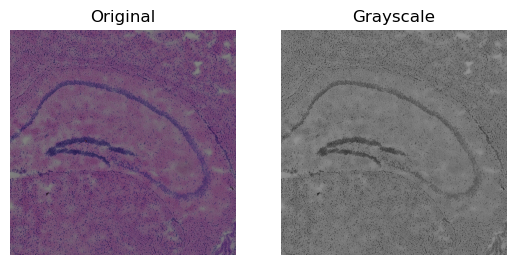

In [7]:
fig, axes = plt.subplots(1, 2)
img.show(ax=axes[0])
_ = axes[0].set_title("Original")
gray.show(cmap="gray", ax=axes[1])
_ = axes[1].set_title("Grayscale")
plt.show()